In [1]:
from time import sleep
from selenium import webdriver
from selenium.webdriver.common.action_chains import ActionChains
from selenium.webdriver.common.keys import Keys 
from selenium.common.exceptions import TimeoutException
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
from bs4 import BeautifulSoup
import csv

In [2]:
# 크롬드라이버 위치 설정
browser = webdriver.Chrome('chromedriver.exe')

browser.maximize_window()
browser.implicitly_wait(20) #gives an implicit wait for 20 seconds
#navigating to a webpage
browser.get('https://www.instagram.com/explore/tags/%EA%B5%AD%EB%82%B4%EC%97%AC%ED%96%89/')

# make sure the browser stays open for 5sec
sleep(5)

#clean exit

''' # 글 가져오는 것 실험
posting = browser.find_element_by_xpath('//*[@id="react-root"]/section/main/article/div[2]/div/div[1]/div[1]')
posting.click()
url = browser.current_url 
print(url)
#getfollowedby(url)
contents = browser.find_element_by_class_name('C4VMK')
print(contents.text)
'''

In [7]:
output = []


posting = browser.find_element_by_xpath('//*[@id="react-root"]/section/main/article/div[1]/div/div/div[1]/div[2]')
posting.click()
for i in range(300):
    sleep(1)
    
    try:
        contents = browser.find_element_by_class_name('C4VMK')
        output.append(contents.text)
    except:
        pass
    next_button = browser.find_element_by_xpath('/html/body/div[4]/div[1]/div/div/a[2]')
    next_button.click()
    
close_button = browser.find_element_by_class_name('ckWGn')
close_button.click()


In [8]:

temp = []
temp2 = []

temp = [x.split() for x in output]

for step2 in temp:
    for step3 in step2:
            if (step3[0] == '#'):
                step3 = step3.replace('#', ' ').split()
                for x in step3:
                    temp2.append(x)

temp2


['대구여행',
 '대구예술발전소',
 'PP11',
 '푸룻푸룻뮤지엄',
 '수창청춘맨숀',
 '대구',
 '실내데이트',
 '봉화',
 '비나리마을',
 'travel',
 'ig_korea',
 'ig_travel',
 'ig_seoul',
 'iseoulu',
 'travelasia',
 'koreanstyle',
 'visitkorea',
 'daily',
 '10media',
 '10mag',
 'korea',
 'seoul',
 '국내여행',
 'southkorea',
 'instagood\u2060',
 '풍경스타그램',
 '구름',
 '일상',
 '데일리',
 '데일리그램',
 '주말',
 '인스타그램',
 '화이팅하세요',
 '셀카',
 '팔로우',
 '좋아요',
 '아름다운',
 '10년째연애중',
 '여행에미치다',
 '국내여행',
 '제주도여행',
 '제주도',
 '신창해안도로',
 '일몰',
 '노을',
 'Korea',
 'Jejuisland',
 'Sunset',
 'Jeju',
 '제주',
 '신창풍차해안도로',
 'Jeju',
 '제주',
 '서귀포',
 '볼스카페',
 '여름휴가',
 '국내여행',
 '제주도여행',
 '제주여행',
 '협재해변',
 '제주도카페',
 '협재카페',
 '명월국민학교',
 '포토존',
 '인증샷',
 '셀카',
 '셀피',
 '일상',
 '여행',
 'selfie',
 'travel',
 'selca',
 'jeju',
 '설이의일상',
 '설이스타그램',
 '셀스타그램',
 '여행사진',
 '더웠지만좋았는데',
 '제주도지겨우면서도좋은데',
 '올해만3번째제주',
 '또갈래',
 '계곡에서',
 '여름',
 '애견동반',
 '식당',
 '계곡',
 '장흥마당바위',
 '계곡에서',
 '식당',
 '계곡',
 '장흥마당바위',
 'jmt',
 '애견동반식당',
 '서울근교맛집',
 '장흥유원지맛집',
 '휴가추천',
 '국내여행',
 '장흥고향산천',
 '장흥계곡',
 '장흥계곡맛집',
 '백숙맛

In [9]:
len(temp2)

3190

In [10]:
file = open('hashtag.txt', 'w', encoding = 'utf-8')
 
for review in temp2:
    file.write(review+'\n')
    
file.close()


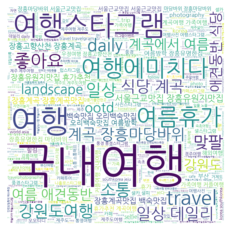

In [24]:
from wordcloud import WordCloud

# Read the whole text.
text = open('hashtag.txt', encoding='utf-8').read()

# Generate a word cloud image
wordcloud = WordCloud(background_color="white", max_words=1000,
                      font_path='C:/Windows/Fonts/NanumGothic.ttf',
                      width=800, height=800).generate(text)

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "Gothic"
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()